# Visualize Interpolation in Return Period Space

In [1]:
from flood_model_paper import *


/Users/ldr.riedel/mambaforge/envs/climada_env_3.9/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


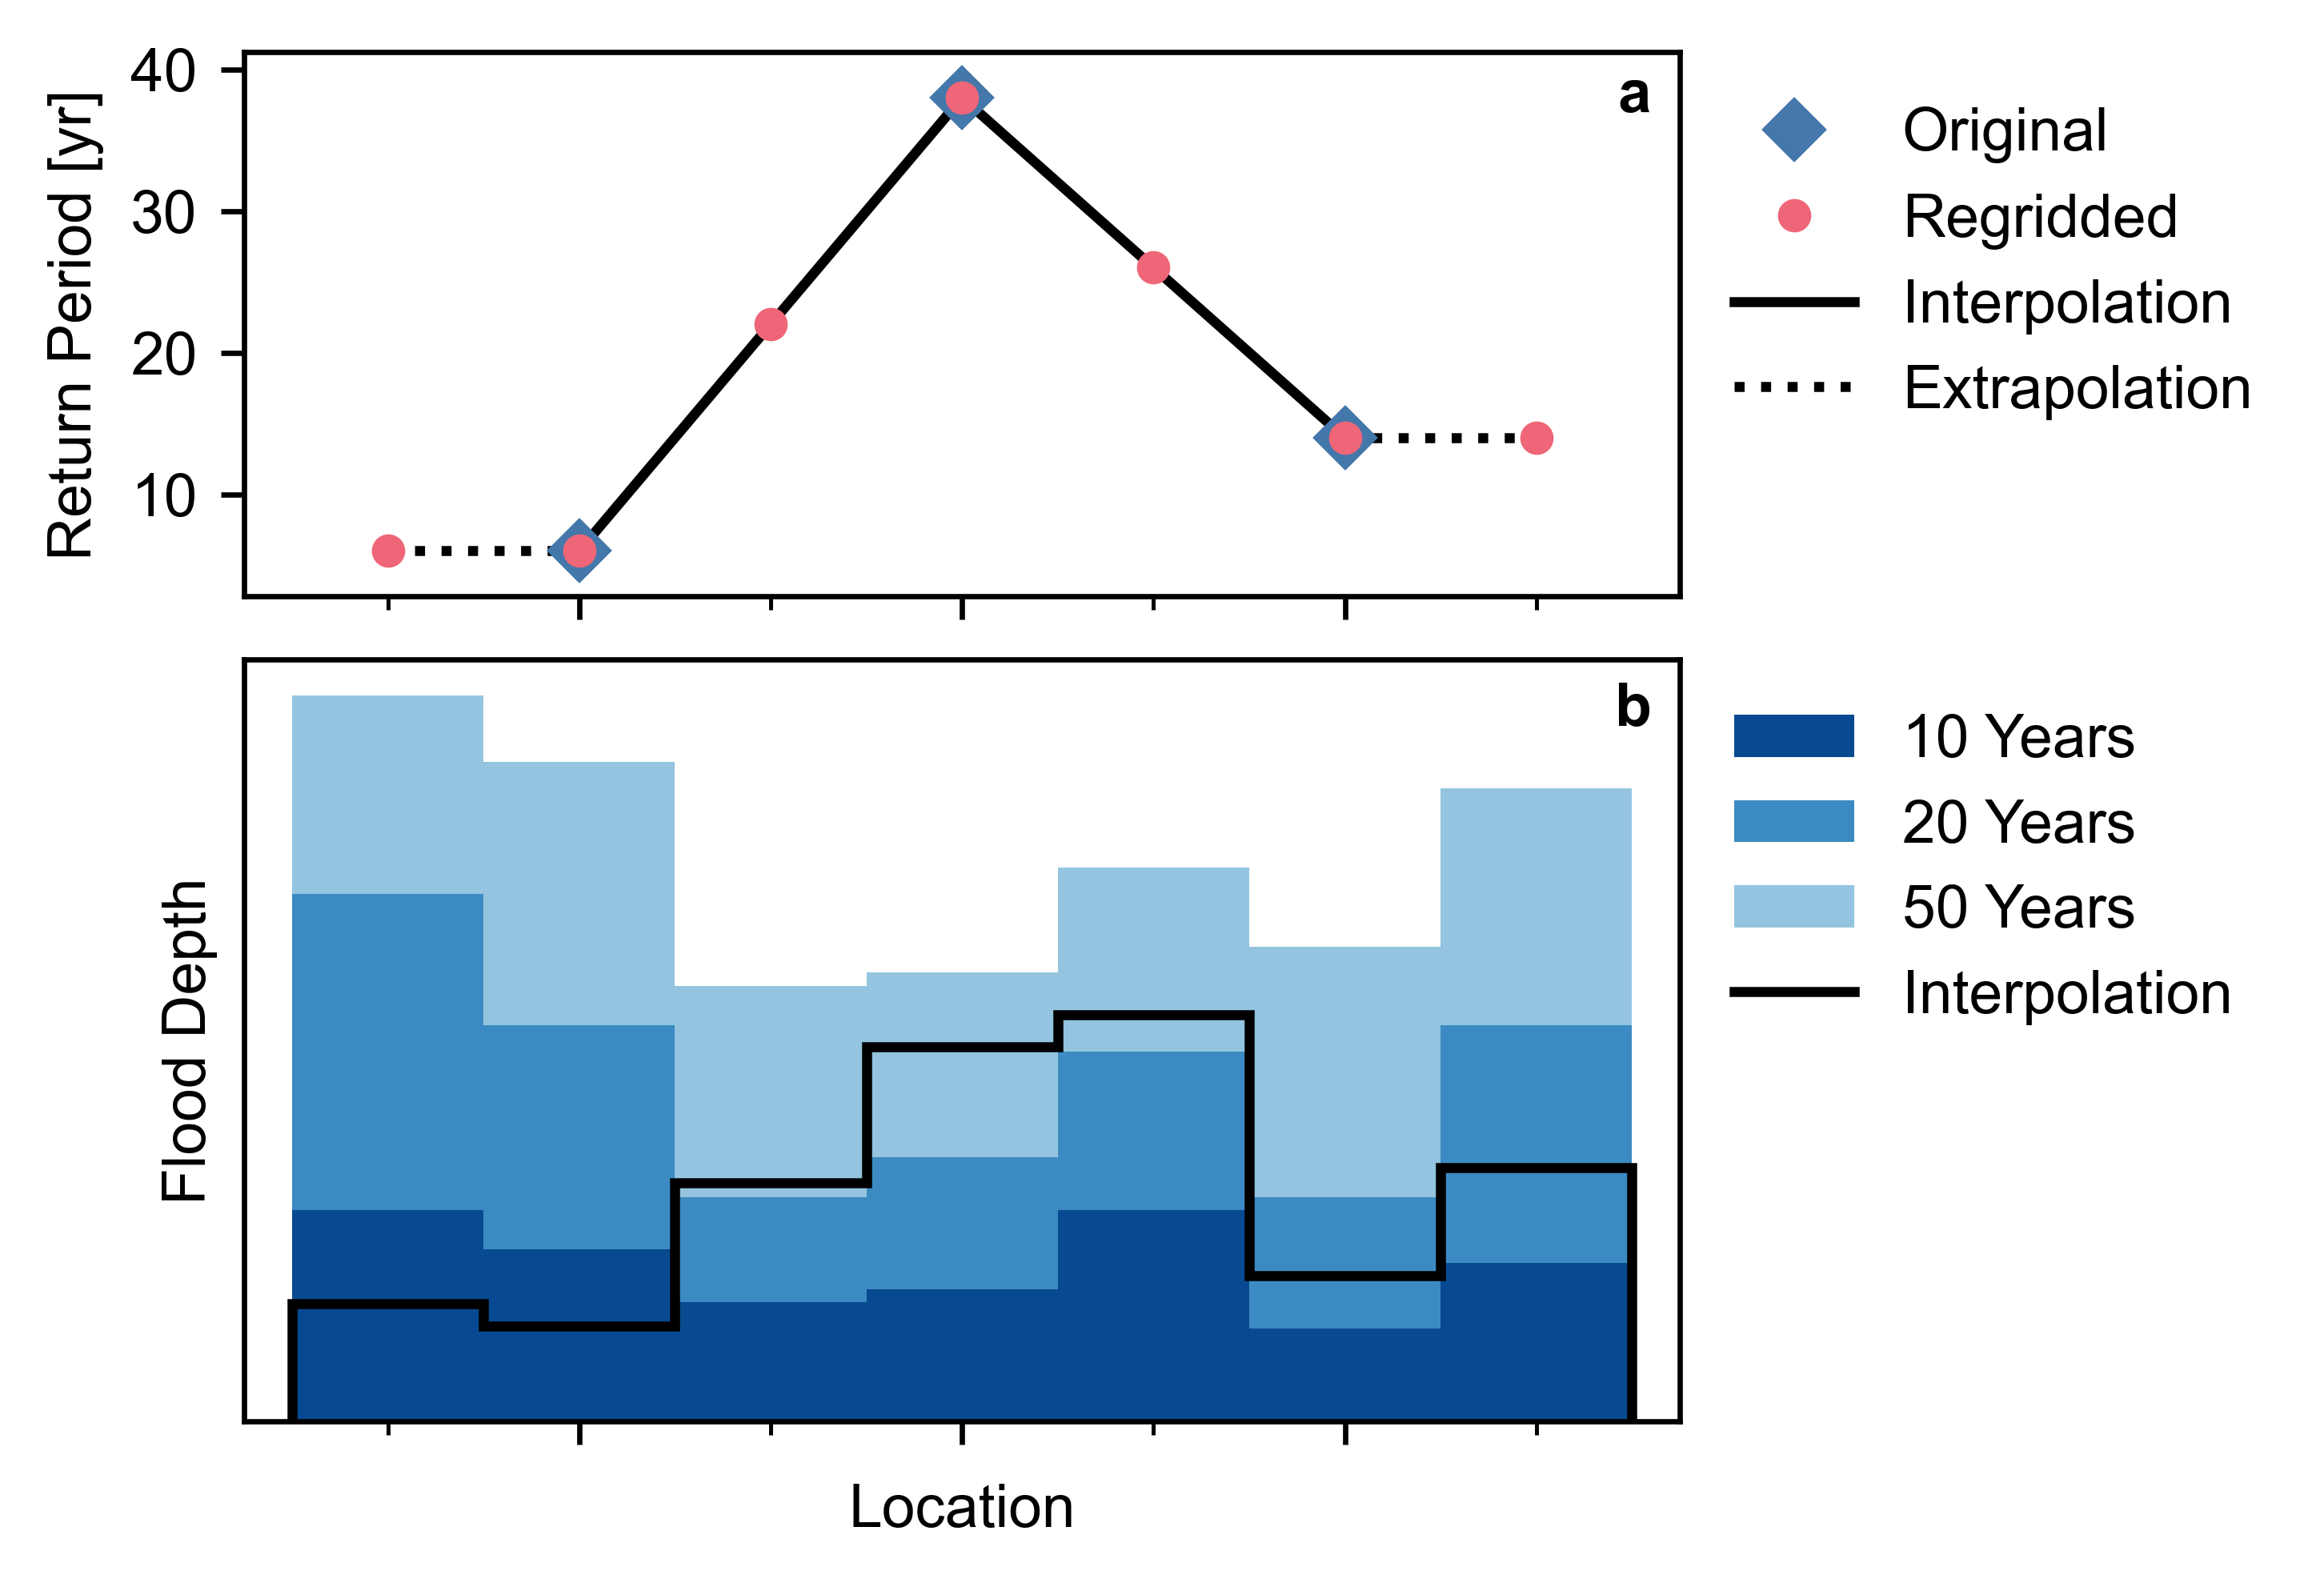

In [9]:
from numpy.random import default_rng


fig, axes = plt.subplots(
    2,
    1,
    sharex=True,
    gridspec_kw=dict(height_ratios=[1, 1.4]),
    figsize=(FIG_WIDTH_TWO_COL, FIG_HEIGHT * 0.9)
)
# axes[0].set_xmargin(0)
# axes[1].set_xmargin(0)
cmap = plt.get_cmap("Blues")

num_x = 3
# num_x_fine = 6
num_x_fine = 7
x = np.array([0, 2, 4])
# x_fine = np.linspace(0, max(x) + 1, num_x_fine)
x_fine = np.linspace(min(x)-1, max(x)+1, num_x_fine)

x= x+1
x_fine = x_fine + 1

rp = np.array([3, 19, 7]) * 2
rp_fine = np.interp(x_fine, x, rp)

axes[0].set_ymargin(0.1)
axes[0].plot(x, rp, "D", color="C0", markersize=6, label="Original", zorder=2)
axes[0].plot(
    x_fine, rp_fine, "o", color="C1", markersize=4, lw=2, label="Regridded", zorder=3
)
axes[0].plot(x, rp, "-", color="k", label="Interpolation", zorder=1)
axes[0].plot(x_fine[-2:], rp_fine[-2:], ":", color="k", label="Extrapolation", zorder=1)
axes[0].plot(x_fine[:2], rp_fine[:2], ":", color="k", zorder=1)

rng = default_rng(4)
# rng = default_rng(9)
# rng = default_rng(42)

# depth_map = rng.exponential(scale=(1, 1, 1), size=(num_x_fine, 3))
# depth_map = rng.poisson(lam=(2, 3, 4), size=(num_x_fine, 3))
# depth_map = rng.poisson(lam=(6, 7, 8), size=(num_x_fine, 3))
depth_map = rng.poisson(lam=(10, 12, 14), size=(num_x_fine, 3))
df = pd.DataFrame(data=depth_map, columns=["10 Years", "20 Years", "50 Years"])
# df = pd.concat([pd.DataFrame.from_dict({"0 Years": np.zeros(5)}), df])
df.plot.bar(
    ax=axes[1],
    stacked=True,
    width=1,
    color={
        column: color
        for column, color in zip(
            df.columns, cmap(np.linspace(0.9, 0.4, len(df.columns)))
        )
    },
)

df["0 Years"] = np.zeros(num_x_fine)
depth = [
    np.interp(x, [1, 10, 20, 50], arr, left=0)
    for x, (_, arr) in zip(
        rp_fine,
        df[["0 Years", "10 Years", "20 Years", "50 Years"]].cumsum(axis=1).iterrows(),
    )
]
axes[1].stairs(
    depth,
    np.arange(min(x_fine)-0.5, max(x_fine)+1.5, 1),
    lw=plt.rcParams["lines.linewidth"],
    color="k",
    label="Interpolation",
)

axes[0].set_ylabel("Return Period [yr]")
axes[0].legend(loc="upper left", bbox_to_anchor=(1.0, 1.0), frameon=False)
# fig.legend(
#     handles=[mlines.Line2D([], [], color="k", label="Interpolation")],
#     loc="outside upper right",
#     frameon=False,
# )

axes[1].set_ylabel("Flood Depth")
axes[1].tick_params("y", left=False, labelleft=False)
axes[1].set_xlabel("Location")
axes[1].tick_params("x", labelbottom=False)
axes[1].xaxis.set_major_locator(mticker.FixedLocator(x))
axes[1].xaxis.set_minor_locator(mticker.FixedLocator(x_fine))

handles, _ = axes[1].get_legend_handles_labels()
axes[1].legend(
    handles=handles[1:] + [handles[0]],
    loc="upper left",
    bbox_to_anchor=(1.0, 1.0),
    frameon=False,
    # title="Flood Maps",
)

for ax, letter in zip(axes, ("a", "b")):
    ax.text(
        0.98,
        0.97,
        letter,
        ha="right",
        va="top",
        bbox=dict(boxstyle="Square, pad=0.1", color="white", alpha=0.8),
        zorder=50,
        transform=ax.transAxes,
        fontweight="bold"
        # fontsize="xx-small",
    )

# for ax, label in zip(axes.flat, ("a", "b")):
#     ax.text(
#         0.02,
#         0.98,
#         label,
#         ha="left",
#         va="top",
#         bbox=dict(boxstyle="Square, pad=0.1", color="white", alpha=0.8, lw=0),
#         zorder=50,
#         transform=ax.transAxes,
#         fontweight="bold"
#         # fontsize="xx-small",
#     )

fig.savefig("interpolation.pdf")